In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization

with open('gtzan_mfcc.json', "r") as file:
    data = json.load(file) #Load MFCC dataset from JSON file

X = np.array(data["mfcc"]) #Load MFCCs 
y = np.array(data["labels"]) #Load corresponding genre names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) #Splitting data into random training and test sets

In [2]:
X_train = X_train[..., np.newaxis] #Increase dimension of array by one
X_test = X_test[..., np.newaxis] #Increase dimension of array by one

In [3]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.05, patience=7) #Reduce learning rate when a metric has stopped improving

model = Sequential() #Initializing a sequential model

model.add(Flatten(input_shape=(X_train.shape[1],X_train.shape[2],1))) #Flattens the input vector

model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 

model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(10, activation = "softmax")) #Add a densely connected output layer to the neural network

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Configures the model for training


In [5]:
model.summary() #Prints a string summary of the network


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

In [6]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=24,
                    epochs=100,
                    callbacks=[rlrop],
                    verbose=2) #Trains the model for a fixed number of epochs

Epoch 1/100
376/376 - 7s - loss: 1.4714 - accuracy: 0.4687 - val_loss: 1.2385 - val_accuracy: 0.5025 - lr: 0.0010 - 7s/epoch - 18ms/step
Epoch 2/100
376/376 - 4s - loss: 1.1299 - accuracy: 0.5542 - val_loss: 1.1691 - val_accuracy: 0.5394 - lr: 0.0010 - 4s/epoch - 12ms/step
Epoch 3/100
376/376 - 5s - loss: 0.9968 - accuracy: 0.6184 - val_loss: 1.1339 - val_accuracy: 0.5583 - lr: 0.0010 - 5s/epoch - 13ms/step
Epoch 4/100
376/376 - 5s - loss: 0.9308 - accuracy: 0.6430 - val_loss: 1.7352 - val_accuracy: 0.4925 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 5/100
376/376 - 5s - loss: 0.9364 - accuracy: 0.6437 - val_loss: 1.2248 - val_accuracy: 0.5294 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 6/100
376/376 - 5s - loss: 0.8756 - accuracy: 0.6657 - val_loss: 1.6073 - val_accuracy: 0.4656 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 7/100
376/376 - 5s - loss: 0.8441 - accuracy: 0.6797 - val_loss: 1.5256 - val_accuracy: 0.5155 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 8/100
376/376 - 5s - loss: 0.8363 -

Epoch 61/100
376/376 - 5s - loss: 0.1098 - accuracy: 0.9623 - val_loss: 0.4037 - val_accuracy: 0.9163 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 62/100
376/376 - 5s - loss: 0.1674 - accuracy: 0.9427 - val_loss: 1.0587 - val_accuracy: 0.7228 - lr: 0.0010 - 5s/epoch - 13ms/step
Epoch 63/100
376/376 - 5s - loss: 0.1978 - accuracy: 0.9320 - val_loss: 0.5684 - val_accuracy: 0.8465 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 64/100
376/376 - 5s - loss: 0.1458 - accuracy: 0.9520 - val_loss: 0.3626 - val_accuracy: 0.8873 - lr: 0.0010 - 5s/epoch - 13ms/step
Epoch 65/100
376/376 - 5s - loss: 0.0993 - accuracy: 0.9687 - val_loss: 0.2032 - val_accuracy: 0.9472 - lr: 5.0000e-05 - 5s/epoch - 14ms/step
Epoch 66/100
376/376 - 6s - loss: 0.0868 - accuracy: 0.9727 - val_loss: 0.1937 - val_accuracy: 0.9511 - lr: 5.0000e-05 - 6s/epoch - 15ms/step
Epoch 67/100
376/376 - 5s - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.1812 - val_accuracy: 0.9511 - lr: 5.0000e-05 - 5s/epoch - 14ms/step
Epoch 68/100
376/376 -

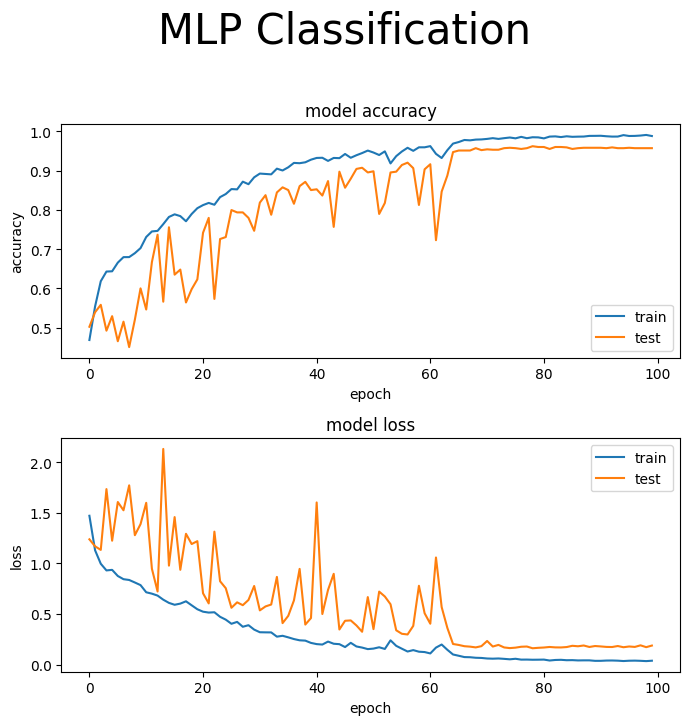

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) #Setting plot dimensions

#Plotting training and test accuracy of model
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plotting training and test loss of model
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('MLP Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import classification_report
labelNames = ['pop','metal','disco','blues','reggae','classical'] #,'rock','hiphop','country','jazz']
predictions = model.predict(X_test, batch_size=24) #Use model to predict on the test data

42/42 [==============================] - 0s 4ms/step


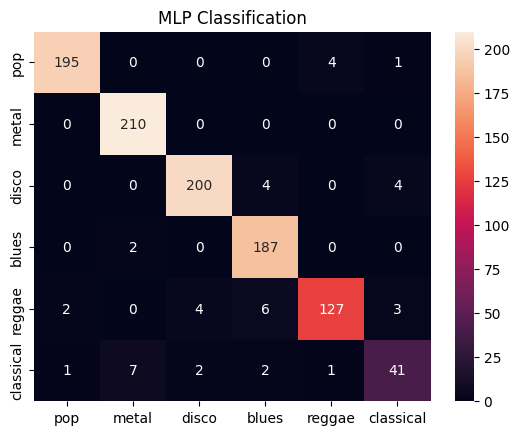

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1)) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as a heatmap
plt.title('MLP Classification');